In [1]:
import pandas as pd
from scipy.stats import rankdata

from gsea.run_single_sample_gsea import run_single_sample_gsea

%matplotlib inline

In [2]:
gene_x_sample = pd.read_table(
    'gene_x_kras_isogenic_and_imortalized_cell_line.tsv', index_col=0)
gene_x_sample

,SLG1_1,SLG2_1,SLGP1_1,SLGP2_1,SLK1PU_1,SLK1_1,SLK2PU_1,SLK2_1,SLKP1_1,SLKP2_1
Name,,,,,,,,,,
7SK,0.095021,0.317834,0.166109,0.000000,0.188393,0.291156,0.103048,0.385592,0.139740,0.000000
A1BG,0.034328,0.019137,0.040007,0.081093,0.170151,0.026296,0.093070,0.116085,0.016828,0.099104
A1CF,0.000000,0.015482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013613,0.008017
A2LD1,1.019684,0.785201,1.957793,1.646291,1.418078,2.135402,1.519507,1.309818,0.747987,1.279170
A2M,0.193676,0.418990,0.256033,0.344846,10.144233,0.419251,0.238250,0.435324,0.325918,0.340488
A2ML1,0.863153,1.158374,0.102432,0.055900,0.017873,0.004604,0.007332,0.008129,0.006629,0.002602
A2ML1-AS1,0.938860,0.672937,0.859698,0.475254,1.063671,0.787689,0.909078,0.544265,0.460236,0.464648
A2MP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007059,0.008804,0.000000,0.000000
A3GALT2P,0.000000,0.000000,0.000000,0.017346,0.072792,0.000000,0.063706,0.000000,0.014398,0.033918


In [3]:
gene_sets = []

with open('c2.all.v5.1.symbols.5.gmt') as f:
    for line in f:
        line = line.strip().split('\t')

        gene_sets.append(line[:1] + line[2:])

gene_sets = pd.DataFrame(gene_sets).set_index(0)

gene_sets

,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
0,,,,,,,,,,,,,,,,,,,,,
ABBUD_LIF_SIGNALING_1_DN,AHNAK,ALCAM,ANKRD40,BCKDHB,C16orf89,CAPN9,CD24,CYFIP1,DCAF11,DDC,...,None,None,None,None,None,None,None,None,None,None
ABBUD_LIF_SIGNALING_1_UP,ACAA2,AHSG,ALDOC,ANXA8L2,BCL3,CEBPB,CXCL14,CYB561,ELF3,FBP1,...,ST3GAL1,STAT3,TAPBP,TMEM176A,TMEM176B,TNFRSF1A,TSPAN4,UPP1,VWF,XBP1
ABBUD_LIF_SIGNALING_2_DN,CGA,CITED2,NALCN,PITX2,PTHLH,SCN1A,ZNF280D,None,None,None,...,None,None,None,None,None,None,None,None,None,None
ABBUD_LIF_SIGNALING_2_UP,ANGPT1,ATP1B1,C2CD4B,COL11A1,DCN,DIO2,EZR,FGFR1,GPX2,JUNB,...,None,None,None,None,None,None,None,None,None,None
ABDELMOHSEN_ELAVL4_TARGETS,BCL2,CAB39,CASP3,CDC42,CDH2,DLG4,EIF2AK2,ITGA1,ITGB1,KCNQ2,...,None,None,None,None,None,None,None,None,None,None


Computing ABBUD_LIF_SIGNALING_1_DN enrichment ...


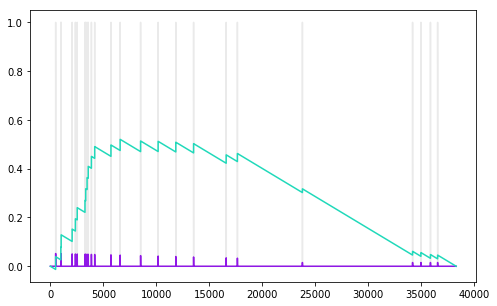

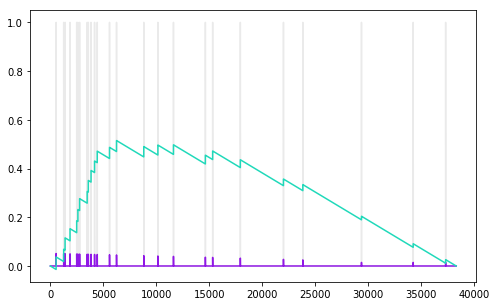

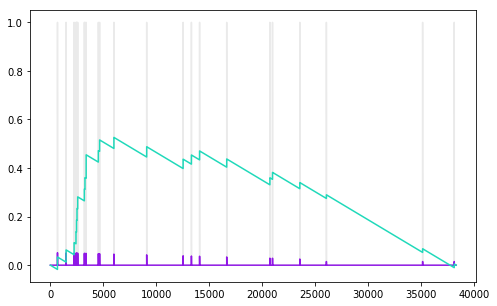

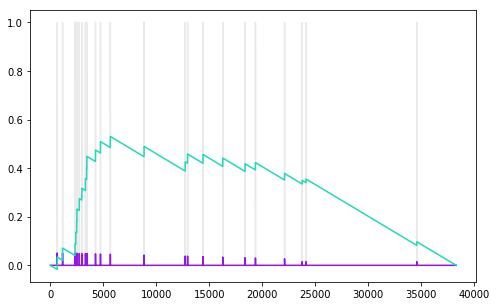

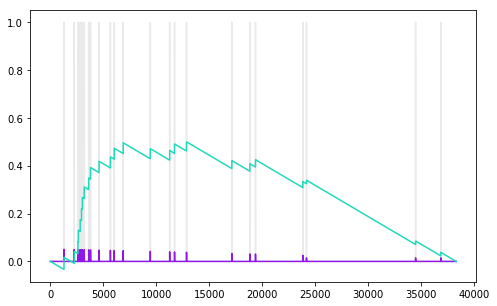

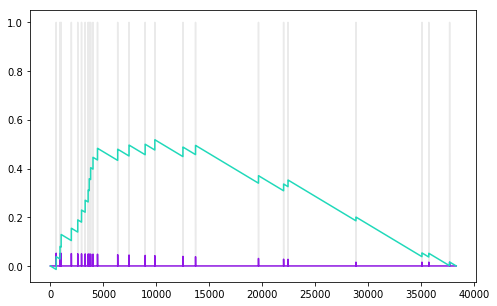

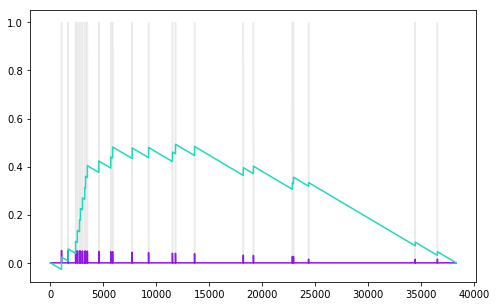

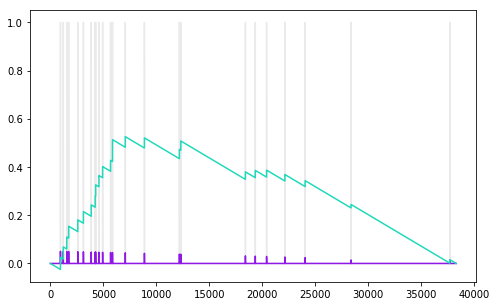

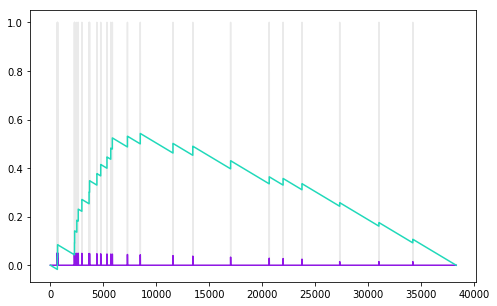

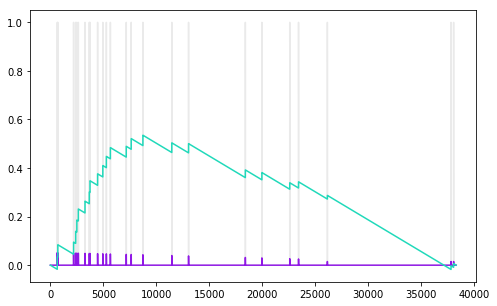

Computing ABBUD_LIF_SIGNALING_1_UP enrichment ...


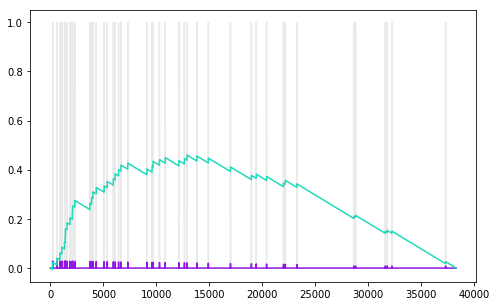

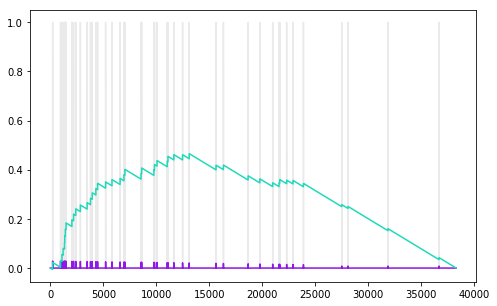

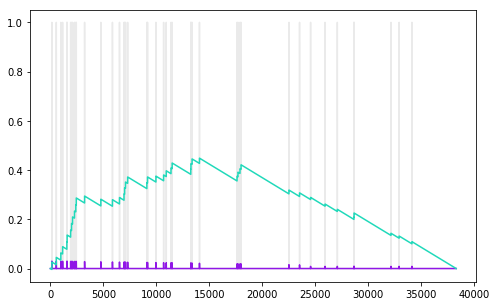

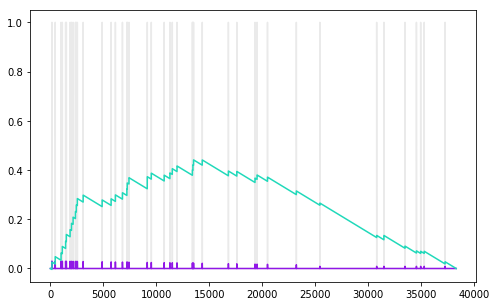

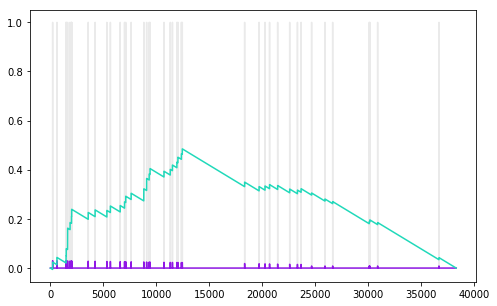

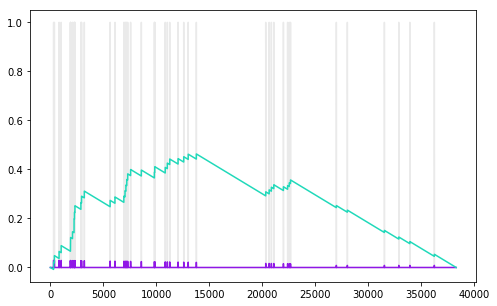

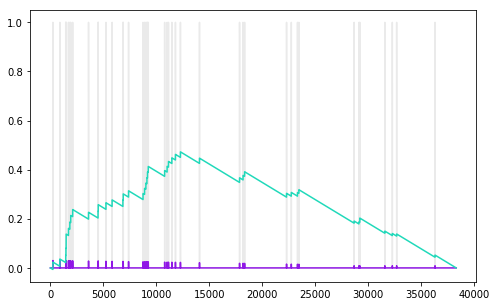

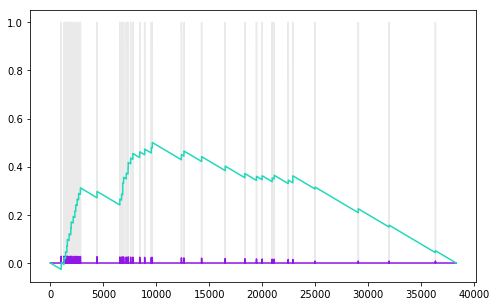

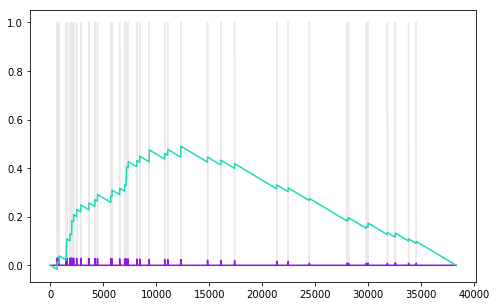

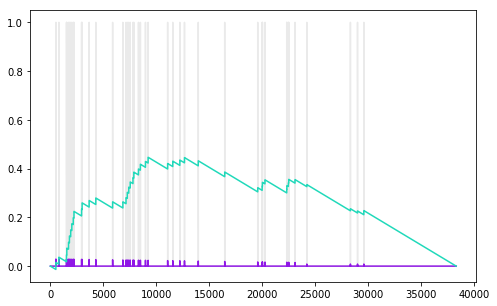

Computing ABBUD_LIF_SIGNALING_2_DN enrichment ...


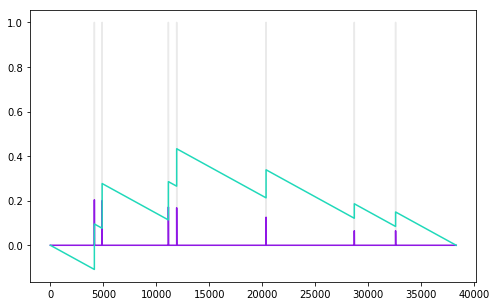

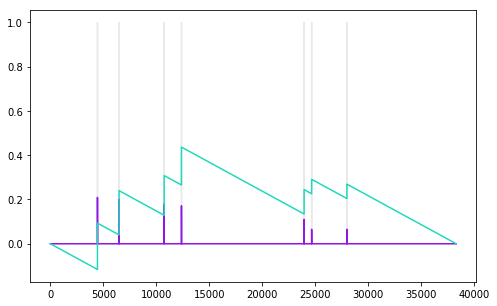

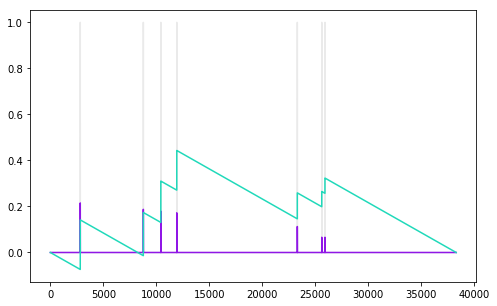

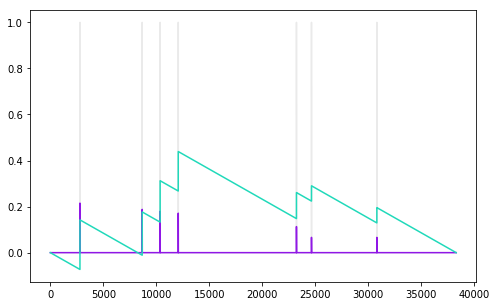

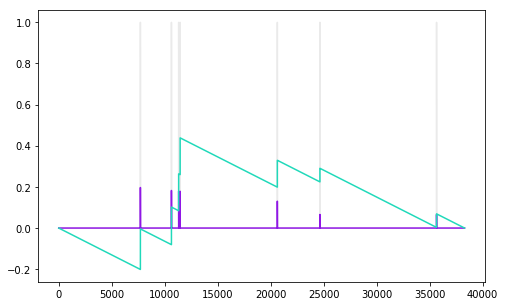

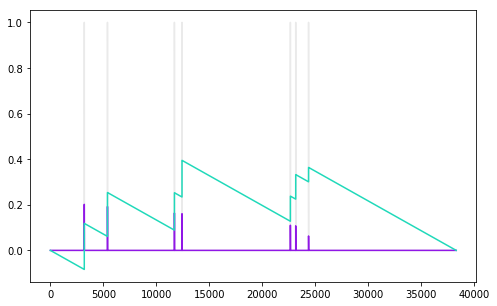

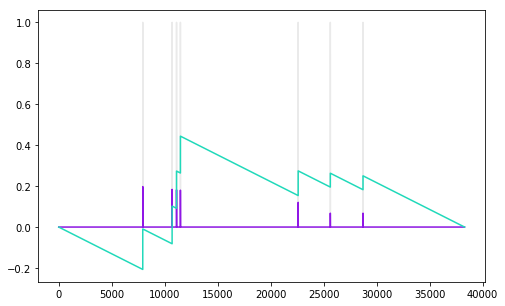

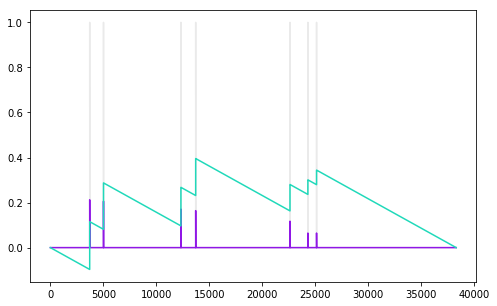

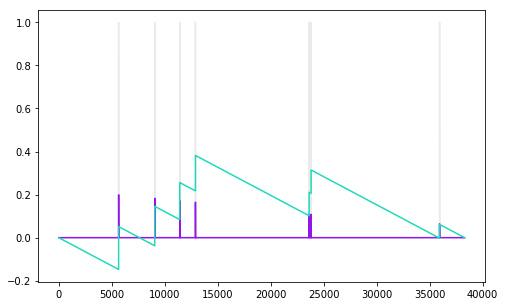

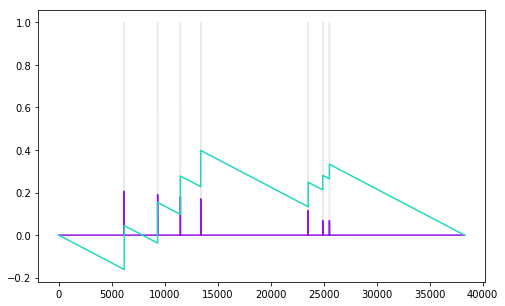

Computing ABBUD_LIF_SIGNALING_2_UP enrichment ...


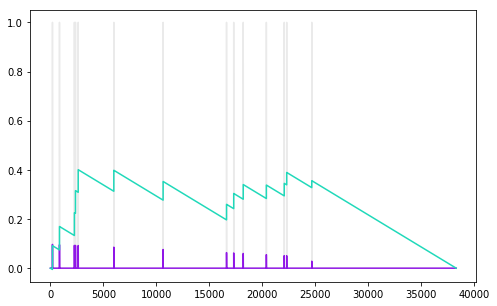

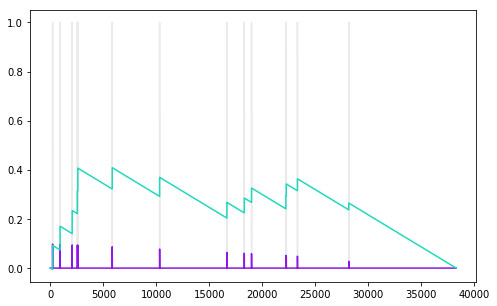

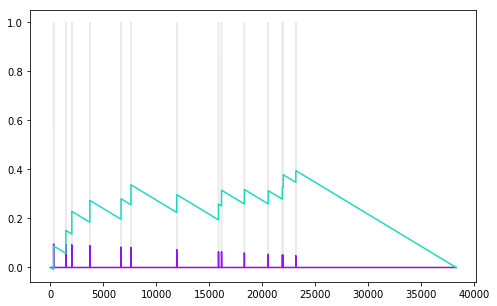

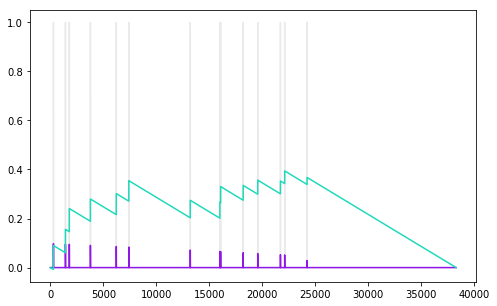

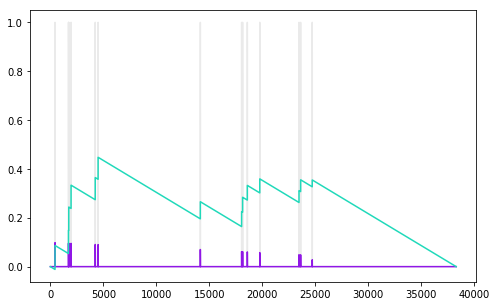

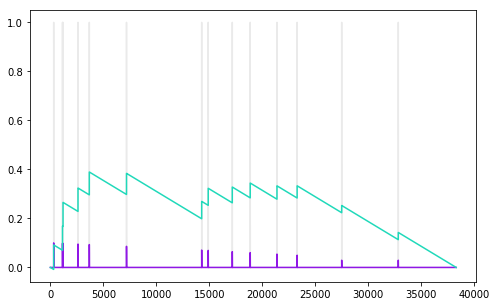

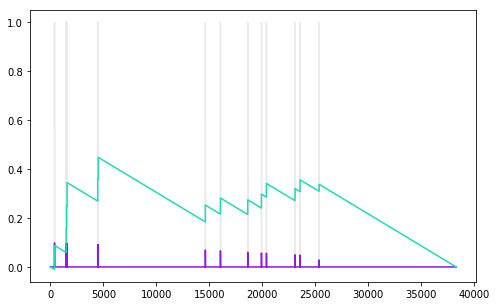

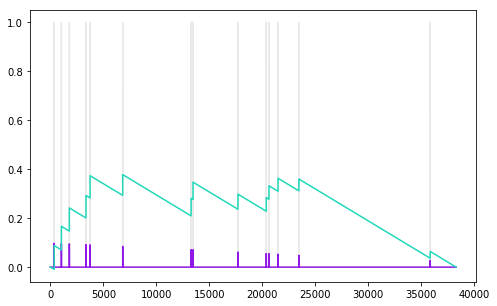

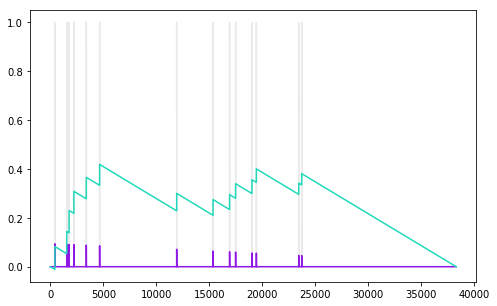

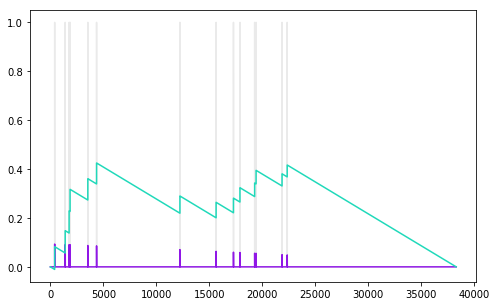

Computing ABDELMOHSEN_ELAVL4_TARGETS enrichment ...


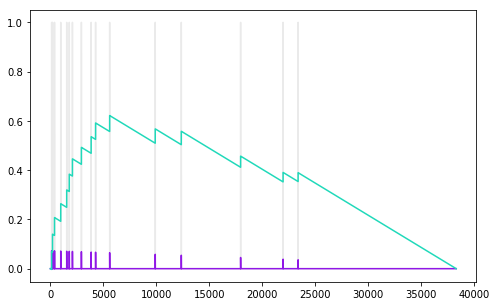

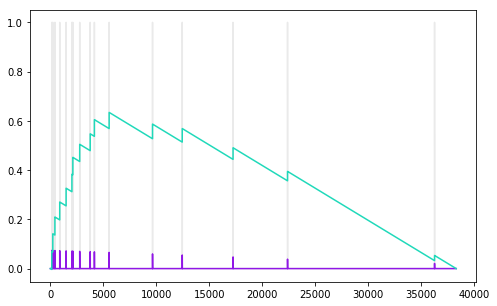

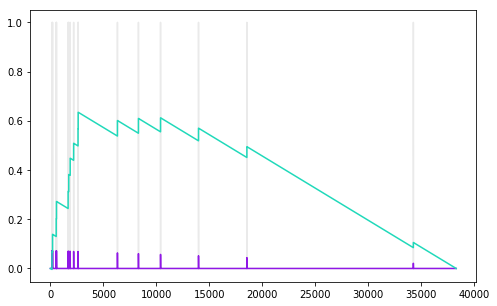

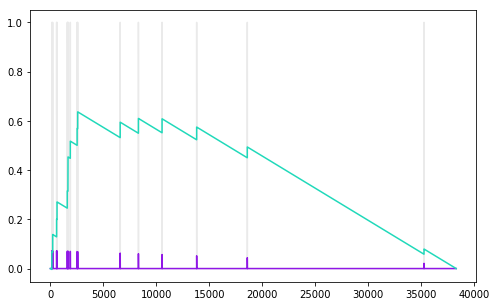

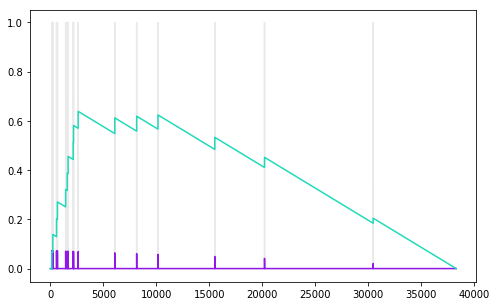

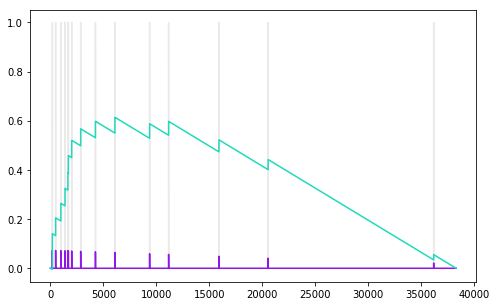

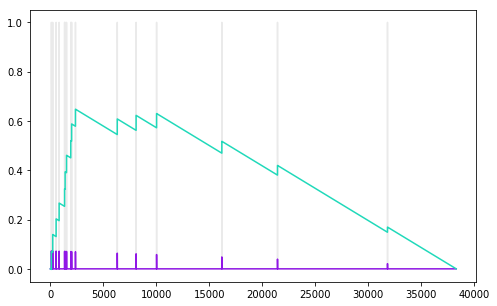

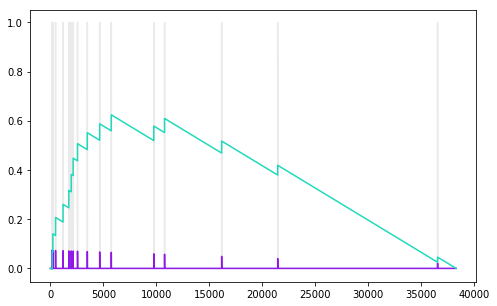

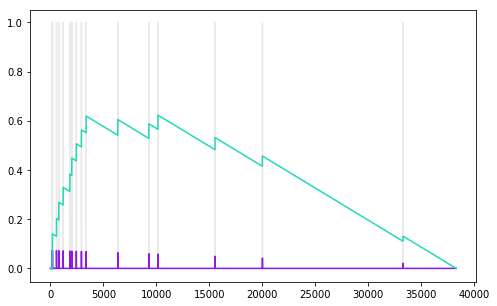

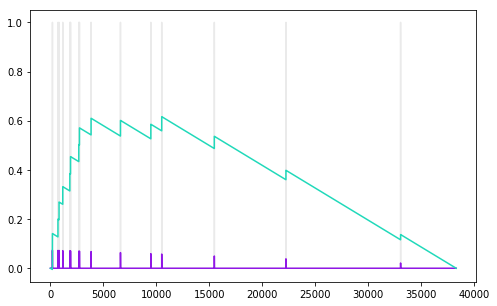

,SLG1_1,SLG2_1,SLGP1_1,SLGP2_1,SLK1PU_1,SLK1_1,SLK2PU_1,SLK2_1,SLKP1_1,SLKP2_1
0,,,,,,,,,,
ABBUD_LIF_SIGNALING_1_DN,11559.195579,11486.799904,11345.595692,11718.575785,11148.257365,11150.207410,11104.528751,11276.479705,11522.974173,11236.124536
ABBUD_LIF_SIGNALING_1_UP,10772.205280,10775.951205,10081.292719,9772.973755,9781.258008,10160.432053,9760.021993,10690.758781,10262.412142,10163.640054
ABBUD_LIF_SIGNALING_2_DN,6865.050348,6812.645271,6926.384538,6681.253312,4941.140900,7023.886351,5111.987568,7121.061296,4821.581514,5575.394950
ABBUD_LIF_SIGNALING_2_UP,9781.021757,9592.178037,8826.064860,9093.859286,9370.833391,9279.283352,9399.004484,9084.086715,9677.919902,9719.623724
ABDELMOHSEN_ELAVL4_TARGETS,13793.705371,13838.535255,14415.675127,14428.977790,14530.831572,14085.183394,14529.318231,13885.029603,14227.099822,14114.487178


In [4]:
gene_set_x_sample = run_single_sample_gsea(
    gene_x_sample.apply(rankdata),
    gene_sets,
    power=0.75,
    statistic='auc',
    plot=True)

gene_set_x_sample